# Clean everything

In [232]:
import os
import shutil

current_folder = os.getcwd()

for item in os.listdir(current_folder):
    item_path = os.path.join(current_folder, item)
    
    if os.path.isfile(item_path) or os.path.islink(item_path):
        os.remove(item_path)
    elif os.path.isdir(item_path):
        shutil.rmtree(item_path)

print("All files and folders have been removed!")

All files and folders have been removed!


# Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load data

In [191]:
input_path = "/kaggle/input/titanic"

In [192]:
train_df = pd.read_csv(f"{input_path}/train.csv", index_col = "PassengerId")
test_df = pd.read_csv(f"{input_path}/test.csv", index_col = "PassengerId")

In [193]:
# train_df.describe

In [194]:
# print(train_df.shape)
# train_df[:2]

In [195]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [196]:
np.unique(train_df.Age)

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan])

In [198]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [199]:
train_df.dtypes.value_counts()

object     5
int64      4
float64    2
Name: count, dtype: int64

In [200]:
continuous_all = train_df.select_dtypes(exclude = 'object').columns
continuous_all

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [201]:
categorical_all = train_df.select_dtypes(include = 'object').columns
categorical_all

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [202]:
target = "Survived"

# Evaluate features

## Hitogram check

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

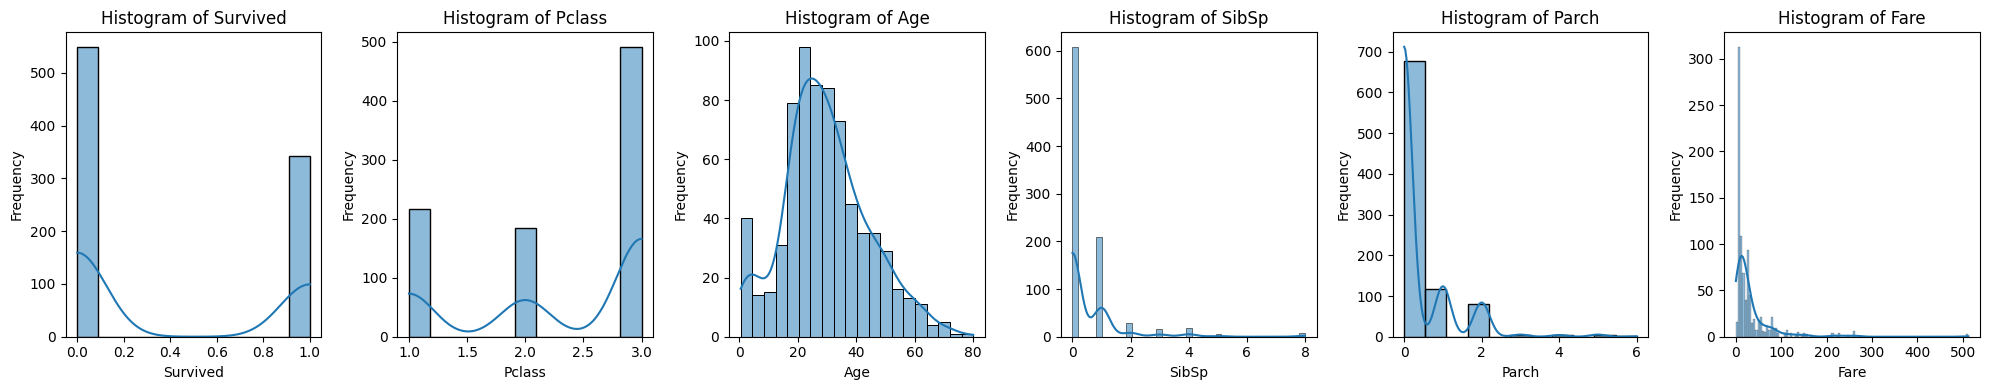

In [203]:
column_quantity = len(continuous_all)
plt.figure(figsize=(20,4))
for i, col in enumerate(continuous_all):
    plt.subplot(1, column_quantity, i+1)
    sns.histplot(train_df[col], kde=True)
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    
plt.tight_layout()

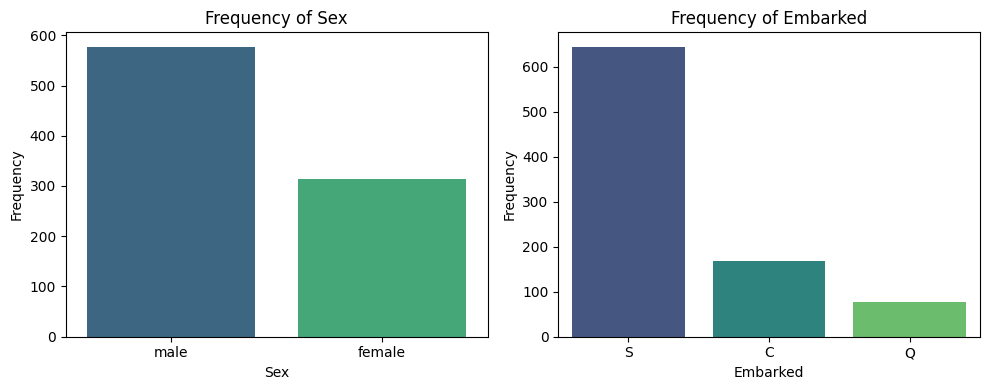

In [204]:
categorical_graph = [x for x in categorical_all if x not in ["Ticket", "Cabin", "Age", "Name"]]
column_quantity = len(categorical_graph)
plt.figure(figsize=(10,4))
for i, col in enumerate(categorical_graph):
    plt.subplot(1, column_quantity, i+1)
    sns.countplot(x=col, data=train_df, palette="viridis")
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {col}')
    
plt.tight_layout()

## Correlation matrix

<Axes: >

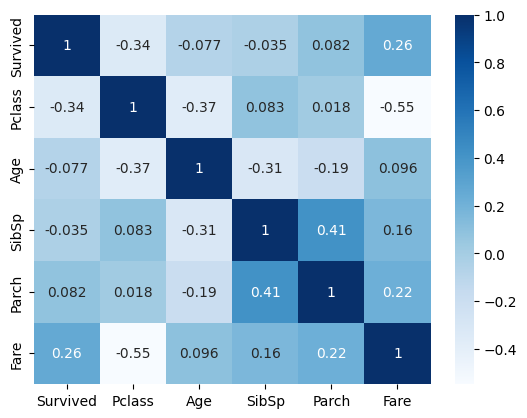

In [205]:
sns.heatmap(train_df[continuous_all].corr(), annot=True, cmap='Blues')

In [206]:
# np.unique(train_df.Name)

# Process data

## Fill NA

In [207]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

## Get title from name

In [208]:
def extract_title(name):
    title = name.split(",")[1].split(".")[0].strip()
    return title
train_df['Title'] = train_df['Name'].apply(extract_title)
test_df['Title'] = test_df['Name'].apply(extract_title)

In [209]:
train_df.Title.value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [210]:
rare = ['Dr', 'Rev', 'Col', 'Major', 'Mlle', 'Mme', 'Ms', 'Don','Donna', 'Lady', 'the Countess', 'Jonkheer', 'Sir', 'Capt']
train_df['Title'] = train_df['Title'].replace(rare, 'Rare')
test_df['Title'] = test_df['Title'].replace(rare, 'Rare')

In [211]:
np.unique(train_df.Title)

array(['Master', 'Miss', 'Mr', 'Mrs', 'Rare'], dtype=object)

In [212]:
np.unique(test_df.Title)

array(['Dona', 'Master', 'Miss', 'Mr', 'Mrs', 'Rare'], dtype=object)

## Get family members

In [213]:
train_df['FamSize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamSize'] = test_df['SibSp'] + test_df['Parch'] + 1
train_df['Alone'] = (train_df['FamSize'] == 1).astype(int)
test_df['Alone'] = (test_df['FamSize'] == 1).astype(int)

# Divide fare into quantile

In [214]:
train_df['FareQuantile'] = pd.qcut(train_df['Fare'], 4, labels=False)
test_df['FareQuantile'] = pd.qcut(test_df['Fare'], 4, labels=False)

# One hot encoder

In [215]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

In [216]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'FamSize', 'Alone', 'FareQuantile', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')

In [217]:
test_df.columns

Index(['Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'FamSize', 'Alone', 'FareQuantile', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare'],
      dtype='object')

In [218]:
# Note that Cabin miss too many values, Name is not usable for training, and Ticket values too various and not potential pattern
try:
    train_df = train_df.drop(["Ticket", "Cabin", "Name", 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis = 1)
    test_df = test_df.drop(["Ticket", "Cabin", "Name", 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis = 1)
except:
    pass
# train_df.Survived = train_df.Survived.astype('object')

In [219]:
features = ['Pclass', 'Age', 'FareQuantile', 'FamSize', 'Alone', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Mr', 'Title_Mrs', 'Title_Miss', 'Title_Rare']
train_df = train_df[features + ['Survived']]
test_df = test_df[features]

### These columns are at type of boolean so I transform it to -6 and 6 so that sigmoid function can map them to 0 and 1

In [220]:
boolean_columns = ['Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Mr', 'Title_Mrs', 'Title_Miss', 'Title_Rare']
train_df[boolean_columns] = train_df[boolean_columns].astype(int).replace({0: -6, 1: 6})
test_df[boolean_columns] = test_df[boolean_columns].astype(int).replace({0: -6, 1: 6})

In [221]:
X = train_df.drop(columns="Survived", axis=1)
y = train_df["Survived"]

In [222]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=50)

In [223]:
X_train.shape

(668, 12)

In [224]:
y_train.shape

(668,)

# Model

In [225]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        """
        Initialize the Logistic Regression model.
        
        Parameters:
        - learning_rate: Step size for gradient descent (default: 0.01).
        - num_iterations: Number of iterations for gradient descent (default: 1000).
        """
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.best_weights = None 
        self.best_bias = None 
        self.best_validation_accuracy = 0 

    def sigmoid(self, z):
        """
        Sigmoid function to map predictions to probabilities.
        
        Parameters:
        - z: Linear combination of inputs and weights.
        
        Returns:
        - Probability value between 0 and 1.
        """
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Train the Logistic Regression model using gradient descent.
        
        Parameters:
        - X: Input features (numpy array of shape (num_samples, num_features)).
        - y: Target labels (numpy array of shape (num_samples,)).
        """
        num_samples, num_features = X.shape

        # Initialize weights and bias to zeros
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient Descent
        for i in range(self.num_iterations):
            # Linear combination of inputs and weights
            linear_model = np.dot(X, self.weights) + self.bias

            # Apply sigmoid to get probabilities
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))  # Gradient of weights
            db = (1 / num_samples) * np.sum(y_predicted - y)  # Gradient of bias

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Validation
            if X_val is not None and y_val is  not None:
                val_predictions = self.predict(X_val)
                val_accuracy = accuracy_score(y_val, val_predictions)
                if val_accuracy > self.best_validation_accuracy:
                    self.best_validation_accuracy = val_accuracy
                    self.best_weights = np.copy(self.weights)
                    self.best_bias = self.bias
                    print(f"✅New best validation accuracy: {val_accuracy:.4f} at iteration {i}")

            # Update if exist
            if X_val is not None and y_val is not None:
                self.weights = self.best_weights
                self.bias = self.best_bias

    def predict_prob(self, X):
        """
        Predict probabilities for the input data.
        
        Parameters:
        - X: Input features (numpy array of shape (num_samples, num_features)).
        
        Returns:
        - Predicted probabilities (numpy array of shape (num_samples,)).
        """
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        """
        Predict class labels for the input data.
        
        Parameters:
        - X: Input features (numpy array of shape (num_samples, num_features)).
        - threshold: Decision boundary for classification (default: 0.5).
        
        Returns:
        - Predicted class labels (0 or 1) (numpy array of shape (num_samples,)).
        """
        probabilities = self.predict_prob(X)
        return (probabilities >= threshold).astype(int)

In [226]:
# Create and train the model
model = LogisticRegression(learning_rate=0.001, num_iterations=7000)
model.fit(X_train, y_train, X_val, y_val)

# Make predictions
y_pred = model.predict(X_val)
print(classification_report(y_pred, y_val))

✅New best validation accuracy: 0.5919 at iteration 0
✅New best validation accuracy: 0.5964 at iteration 3
✅New best validation accuracy: 0.6099 at iteration 4
✅New best validation accuracy: 0.6143 at iteration 8
✅New best validation accuracy: 0.6233 at iteration 10
✅New best validation accuracy: 0.6278 at iteration 11
✅New best validation accuracy: 0.6323 at iteration 12
✅New best validation accuracy: 0.6368 at iteration 15
✅New best validation accuracy: 0.6502 at iteration 16
✅New best validation accuracy: 0.6592 at iteration 18
✅New best validation accuracy: 0.6951 at iteration 19
✅New best validation accuracy: 0.7130 at iteration 21
✅New best validation accuracy: 0.7265 at iteration 23
✅New best validation accuracy: 0.7399 at iteration 24
✅New best validation accuracy: 0.7534 at iteration 25
✅New best validation accuracy: 0.7578 at iteration 26
✅New best validation accuracy: 0.7623 at iteration 27
✅New best validation accuracy: 0.7713 at iteration 28
✅New best validation accuracy: 0

# Testing

In [227]:
test_df.columns

Index(['Pclass', 'Age', 'FareQuantile', 'FamSize', 'Alone', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Title_Mr', 'Title_Mrs', 'Title_Miss',
       'Title_Rare'],
      dtype='object')

In [228]:
train_df.columns

Index(['Pclass', 'Age', 'FareQuantile', 'FamSize', 'Alone', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Title_Mr', 'Title_Mrs', 'Title_Miss',
       'Title_Rare', 'Survived'],
      dtype='object')

In [233]:
# features = [x for x in list(train_df.columns) if x not in ["Survived"]]
# features = ['Pclass', 'Age', 'FareQuantile', 'FamSize', 'Alone', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Mr', 'Title_Mrs', 'Title_Miss', 'Title_Rare']
predictions = model.predict(test_df)

submission = pd.DataFrame({'PassengerId': test_df.index, 'Survived': predictions})
submission.to_csv('submission.csv', index=False)